In [1]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')


import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb

import pandas as pd
import numpy as np

from tigramite.models import Models, Prediction

import math
#import sklearn
#from sklearn.linear_model import LinearRegression

/home/sshudhees/anaconda3/envs/test/lib/python3.10/site-packages/tigramite/plotting.py:26: UserWarning: [Errno 2] No such file or directory: '/home/sshudhees/anaconda3/envs/test/lib/python3.10/site-packages/tigramite/../versions.py'
  warnings.warn(str(e))
/home/sshudhees/anaconda3/envs/test/lib/python3.10/site-packages/tigramite/independence_tests/gpdc.py:27: UserWarning: [Errno 2] No such file or directory: '/home/sshudhees/anaconda3/envs/test/lib/python3.10/site-packages/tigramite/independence_tests/../../versions.py'
  warnings.warn(str(e))
/home/sshudhees/anaconda3/envs/test/lib/python3.10/site-packages/tigramite/independence_tests/gpdc_torch.py:33: UserWarning: No module named 'torch'
  warnings.warn(str(e))
/home/sshudhees/anaconda3/envs/test/lib/python3.10/site-packages/tigramite/models.py:29: UserWarning: [Errno 2] No such file or directory: '/home/sshudhees/anaconda3/envs/test/lib/python3.10/site-packages/tigramite/../versions.py'
  warnings.warn(str(e))


In [2]:
def select_links(tau_min, tau_max, parents, children):
    """
    This function selects the causal links that will be tested by
    PCMCI. The links are selected such that per each variable in
    `children` all `parents` are stablished as causes, and no other
    causal relationships exist.
    
    Assumes `parents` and `children` are disjoint sets, and that all
    variables are included in the union of both sets.
    
    Parameters
    ----------
    tau_min : int
        Minimum time lag to test. Note that zero-lags are undirected.
    tau_max : int
        Maximum time lag. Must be larger or equal to tau_min.
    parents : set of int
        List of variables that will be assigned as a parent link.
        Assumed to be disjoint with children
    children : set of int
        List of variables that will be assigned a link from a parent.
        Assumed to be disjoint with parents
    Returns
    -------
    selected_links: dict
        Dictionary of selected links for Tigramite
        
    """

    parents = set(parents)
    children = set(children)

    selected_links = dict()
    # Set the default as all combinations of the selected variables
    for var in [*children, *parents]:
        if var in children:
            # Children can be caused only by parents and by themselves
            selected_links[var] = [
                (parent, -lag)
                for parent in parents
                for lag in range(tau_min, tau_max + 1)
            ]
        else:
            selected_links[var] = []

    return selected_links

In [3]:
p1="../timeseries_tigramite/"
p2="../targets/"

In [4]:
df = pd.read_csv(p1+"timeseries_all_nio_fani.csv",sep=',')
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df=df.drop('a', axis=1)
dd=df.drop('Pmin', axis=1)

In [6]:
d1=pd.read_csv(p2+'2019_integrated_prate_nio_fani.csv')
d1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
d1=d1.drop('a', axis=1)

In [7]:
dt=pd.concat([d1,df],axis=1, join='inner')

In [8]:
var_names_wmax=dt.columns.values.tolist()
tc_wmax=dt.values

In [10]:
dataframe = pp.DataFrame(tc_wmax,analysis_mode ='single',
                         datatime = np.arange(len(tc_wmax)), 
                         var_names=var_names_wmax)

tau_max0 = 16
tau_min0 = 1
children = [0,1,2]
parents = np.arange(3,271)


sel_links = select_links(tau_min0, tau_max0, parents, children)

/home/sshudhees/anaconda3/envs/test/lib/python3.10/site-packages/tigramite/data_processing.py:291: UserWarning: In analysis mode 'single', 'data'.shape = (58, 271); is it of shape (observations, variables)?
  warnings.warn("In analysis mode 'single', 'data'.shape = ({}, {});"\


In [11]:
parcorr = ParCorr(significance='analytic') #partial correlation
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
correlations = pcmci.get_lagged_dependencies(tau_min=tau_min0,tau_max=tau_max0,val_only=True)['val_matrix']


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 1
tau_max = 16


In [12]:
pcmci.verbosity = 1
results = pcmci.run_pc_stable(selected_links = sel_links, tau_max=tau_max0, tau_min=tau_min0, pc_alpha=None)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
selected_links = {0: [(3, -1), (3, -2), (3, -3), (3, -4), (3, -5), (3, -6), (3, -7), (3, -8), (3, -9), (3, -10), (3, -11), (3, -12), (3, -13), (3, -14), (3, -15), (3, -16), (4, -1), (4, -2), (4, -3), (4, -4), (4, -5), (4, -6), (4, -7), (4, -8), (4, -9), (4, -10), (4, -11), (4, -12), (4, -13), (4, -14), (4, -15), (4, -16), (5, -1), (5, -2), (5, -3), (5, -4), (5, -5), (5, -6), (5, -7), (5, -8), (5, -9), (5, -10), (5, -11), (5, -12), (5, -13), (5, -14), (5, -15), (5, -16), (6, -1), (6, -2), (6, -3), (6, -4), (6, -5), (6, -6), (6, -7), (6, -8), (6, -9), (6, -10), (6, -11), (6, -12), (6, -13), (6, -14), (6, -15), (6, -16), (7, -1), (7, -2), (7, -3), (7, -4), (7, -5), (7, -6), (7, -7), (7, -8), (7, -9), (7, -10), (7, -11), (7, -12), (7, -13), (7, -14), (7, -15), (7, -16), (8, -1), (8, -2), (8, -3), (8, -4), (8, -5), (8, -6), (8, -7), (8, -8), (8, -9), (8, -10), (8, -11), (8, -12), (8, -13), (8, -14), (8, -15), (8, -16), (9, 


## Resulting lagged parent (super)sets:

    Variable Prec_Intg has 10 link(s):
    [pc_alpha = 0.5]
        (tot_suprcool_liqwtr -6): max_pval = 0.00091, min_val = -0.633
        (vvel_700 -5): max_pval = 0.01271, min_val =  0.590
        (out_div250 -14): max_pval = 0.01934, min_val = -0.484
        (rhum_100 -13): max_pval = 0.14899, min_val =  0.326
        (outvvel_30 -1): max_pval = 0.16716, min_val = -0.285
        (vvel_30 -8): max_pval = 0.26592, min_val = -0.231
        (outinst_moisture_flux -12): max_pval = 0.32988, min_val =  0.199
        (outsurfmean_lhf -14): max_pval = 0.48494, min_val = -0.166
        (outsurf_lhf -14): max_pval = 0.48494, min_val = -0.166
        (gpot_150 -3): max_pval = 0.46005, min_val =  0.180

    Variable Pmin has 13 link(s):
    [pc_alpha = 0.5]
        (eqt300 -16): max_pval = 0.04306, min_val = -0.496
        (rhum_10 -14): max_pval = 0.06742, min_val =  0.468
        (rhum_400 -14): max_pval = 0.17533, min_val = -0.307
        (out_eqt700 

In [13]:
pcmci.verbosity = 1
results = pcmci.run_pc_stable(selected_links = sel_links, tau_max=tau_max0, tau_min=tau_min0, pc_alpha=0.05)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
selected_links = {0: [(3, -1), (3, -2), (3, -3), (3, -4), (3, -5), (3, -6), (3, -7), (3, -8), (3, -9), (3, -10), (3, -11), (3, -12), (3, -13), (3, -14), (3, -15), (3, -16), (4, -1), (4, -2), (4, -3), (4, -4), (4, -5), (4, -6), (4, -7), (4, -8), (4, -9), (4, -10), (4, -11), (4, -12), (4, -13), (4, -14), (4, -15), (4, -16), (5, -1), (5, -2), (5, -3), (5, -4), (5, -5), (5, -6), (5, -7), (5, -8), (5, -9), (5, -10), (5, -11), (5, -12), (5, -13), (5, -14), (5, -15), (5, -16), (6, -1), (6, -2), (6, -3), (6, -4), (6, -5), (6, -6), (6, -7), (6, -8), (6, -9), (6, -10), (6, -11), (6, -12), (6, -13), (6, -14), (6, -15), (6, -16), (7, -1), (7, -2), (7, -3), (7, -4), (7, -5), (7, -6), (7, -7), (7, -8), (7, -9), (7, -10), (7, -11), (7, -12), (7, -13), (7, -14), (7, -15), (7, -16), (8, -1), (8, -2), (8, -3), (8, -4), (8, -5), (8, -6), (8, -7), (8, -8), (8, -9), (8, -10), (8, -11), (8, -12), (8, -13), (8, -14), (8, -15), (8, -16), (9, 


## Resulting lagged parent (super)sets:

    Variable Prec_Intg has 4 link(s):
        (tot_suprcool_liqwtr -6): max_pval = 0.00091, min_val = -0.633
        (vvel_700 -5): max_pval = 0.00393, min_val =  0.589
        (out_div250 -14): max_pval = 0.01934, min_val = -0.484
        (rhum_100 -13): max_pval = 0.02333, min_val =  0.471

    Variable Pmin has 5 link(s):
        (eqt300 -16): max_pval = 0.00607, min_val = -0.591
        (outgpot_950 -16): max_pval = 0.04660, min_val =  0.439
        (outvort_975 -8): max_pval = 0.04959, min_val = -0.434
        (outvort_1000 -8): max_pval = 0.03511, min_val = -0.423
        (outrhum_400 -12): max_pval = 0.04950, min_val =  0.397

    Variable w10max has 4 link(s):
        (out_div400 -13): max_pval = 0.00549, min_val = -0.560
        (rhum_10 -14): max_pval = 0.00876, min_val = -0.533
        (outvort_250 -14): max_pval = 0.00729, min_val = -0.523
        (outvort_10 -11): max_pval = 0.04147, min_val =  0.411

    Variable div100 has 0 link

In [14]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(selected_links = sel_links, tau_max=tau_max0, tau_min=tau_min0, pc_alpha=None)




##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
selected_links = {0: [(3, -1), (3, -2), (3, -3), (3, -4), (3, -5), (3, -6), (3, -7), (3, -8), (3, -9), (3, -10), (3, -11), (3, -12), (3, -13), (3, -14), (3, -15), (3, -16), (4, -1), (4, -2), (4, -3), (4, -4), (4, -5), (4, -6), (4, -7), (4, -8), (4, -9), (4, -10), (4, -11), (4, -12), (4, -13), (4, -14), (4, -15), (4, -16), (5, -1), (5, -2), (5, -3), (5, -4), (5, -5), (5, -6), (5, -7), (5, -8), (5, -9), (5, -10), (5, -11), (5, -12), (5, -13), (5, -14), (5, -15), (5, -16), (6, -1), (6, -2), (6, -3), (6, -4), (6, -5), (6, -6), (6, -7), (6, -8), (6, -9), (6, -10), (6, -11), (6, -12), (6, -13), (6, -14), (6, -15), (6, -16), (7, -1), (7, -2), (7, -3), (7, -4), (7, -5), (7, -6), (7, -7), (7, -8), (7, -9), (7, -10), (7, -11), (7, -12), (7, -13), (7, -14), (7, -15), (7, -16), (8, -1), (8, -2), (8, -3), (8, -4), (8, -5), (8, -6), (8, -7), (8, -8), (8, -9), (8, -10), (8, -11), (8, -12), (8, -13), (8, -14), (8, -15), (8, -16), (9, 


## Resulting lagged parent (super)sets:

    Variable Prec_Intg has 10 link(s):
    [pc_alpha = 0.5]
        (tot_suprcool_liqwtr -6): max_pval = 0.00091, min_val = -0.633
        (vvel_700 -5): max_pval = 0.01271, min_val =  0.590
        (out_div250 -14): max_pval = 0.01934, min_val = -0.484
        (rhum_100 -13): max_pval = 0.14899, min_val =  0.326
        (outvvel_30 -1): max_pval = 0.16716, min_val = -0.285
        (vvel_30 -8): max_pval = 0.26592, min_val = -0.231
        (outinst_moisture_flux -12): max_pval = 0.32988, min_val =  0.199
        (outsurfmean_lhf -14): max_pval = 0.48494, min_val = -0.166
        (outsurf_lhf -14): max_pval = 0.48494, min_val = -0.166
        (gpot_150 -3): max_pval = 0.46005, min_val =  0.180

    Variable Pmin has 13 link(s):
    [pc_alpha = 0.5]
        (eqt300 -16): max_pval = 0.04306, min_val = -0.496
        (rhum_10 -14): max_pval = 0.06742, min_val =  0.468
        (rhum_400 -14): max_pval = 0.17533, min_val = -0.307
        (out_eqt700 


## Significant links at alpha = 0.05:

    Variable Prec_Intg has 33 link(s):
        (tot_suprcool_liqwtr -6): pval = 0.00000 | val = -0.955
        (out_div250 -14): pval = 0.00000 | val = -0.916
        (vvel_700 -5): pval = 0.00000 | val =  0.880
        (outinst_moisture_flux -12): pval = 0.00001 | val = -0.867
        (rhum_100 -13): pval = 0.00045 | val =  0.756
        (outvvel_30 -1): pval = 0.00056 | val = -0.748
        (vvel_30 -8): pval = 0.00138 | val = -0.711
        (eqt925 -11): pval = 0.00256 | val =  0.699
        (vvel_20 -3): pval = 0.00409 | val = -0.675
        (vi_div_tot_enrgy_flux -1): pval = 0.01923 | val = -0.577
        (outvvel_50 -2): pval = 0.01963 | val =  0.576
        (vvel_70 -16): pval = 0.02443 | val = -0.559
        (out_div500 -9): pval = 0.02589 | val = -0.554
        (vort_100 -6): pval = 0.03281 | val =  0.535
        (rhum_20 -4): pval = 0.03349 | val = -0.533
        (vi_div_mass_flux -15): pval = 0.03373 | val =  0.532
        (vvel_70 -4)

In [15]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'],selected_links = sel_links, tau_min=tau_min0,tau_max=tau_max0, fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.05)
graph = pcmci.get_graph_from_pmatrix(p_matrix=q_matrix, alpha_level=0.05,
                                     tau_min=tau_min0,tau_max=tau_max0, selected_links=sel_links)
results['graph'] = graph



## Significant links at alpha = 0.05:

    Variable Prec_Intg has 4 link(s):
        (tot_suprcool_liqwtr -6): pval = 0.00004 | val = -0.955
        (out_div250 -14): pval = 0.00164 | val = -0.916
        (vvel_700 -5): pval = 0.00954 | val =  0.880
        (outinst_moisture_flux -12): pval = 0.01427 | val = -0.867

    Variable Pmin has 2 link(s):
        (eqt300 -16): pval = 0.00511 | val = -0.932
        (rhum_400 -14): pval = 0.00954 | val = -0.918

    Variable w10max has 1 link(s):
        (out_div400 -13): pval = 0.03145 | val = -0.848

    Variable div100 has 0 link(s):

    Variable div200 has 0 link(s):

    Variable div250 has 0 link(s):

    Variable div300 has 0 link(s):

    Variable div400 has 0 link(s):

    Variable div500 has 0 link(s):

    Variable eqt1000 has 0 link(s):

    Variable eqt200 has 0 link(s):

    Variable eqt250 has 0 link(s):

    Variable eqt300 has 0 link(s):

    Variable eqt400 has 0 link(s):

    Variable eqt500 has 0 link(s):

    Variable eqt

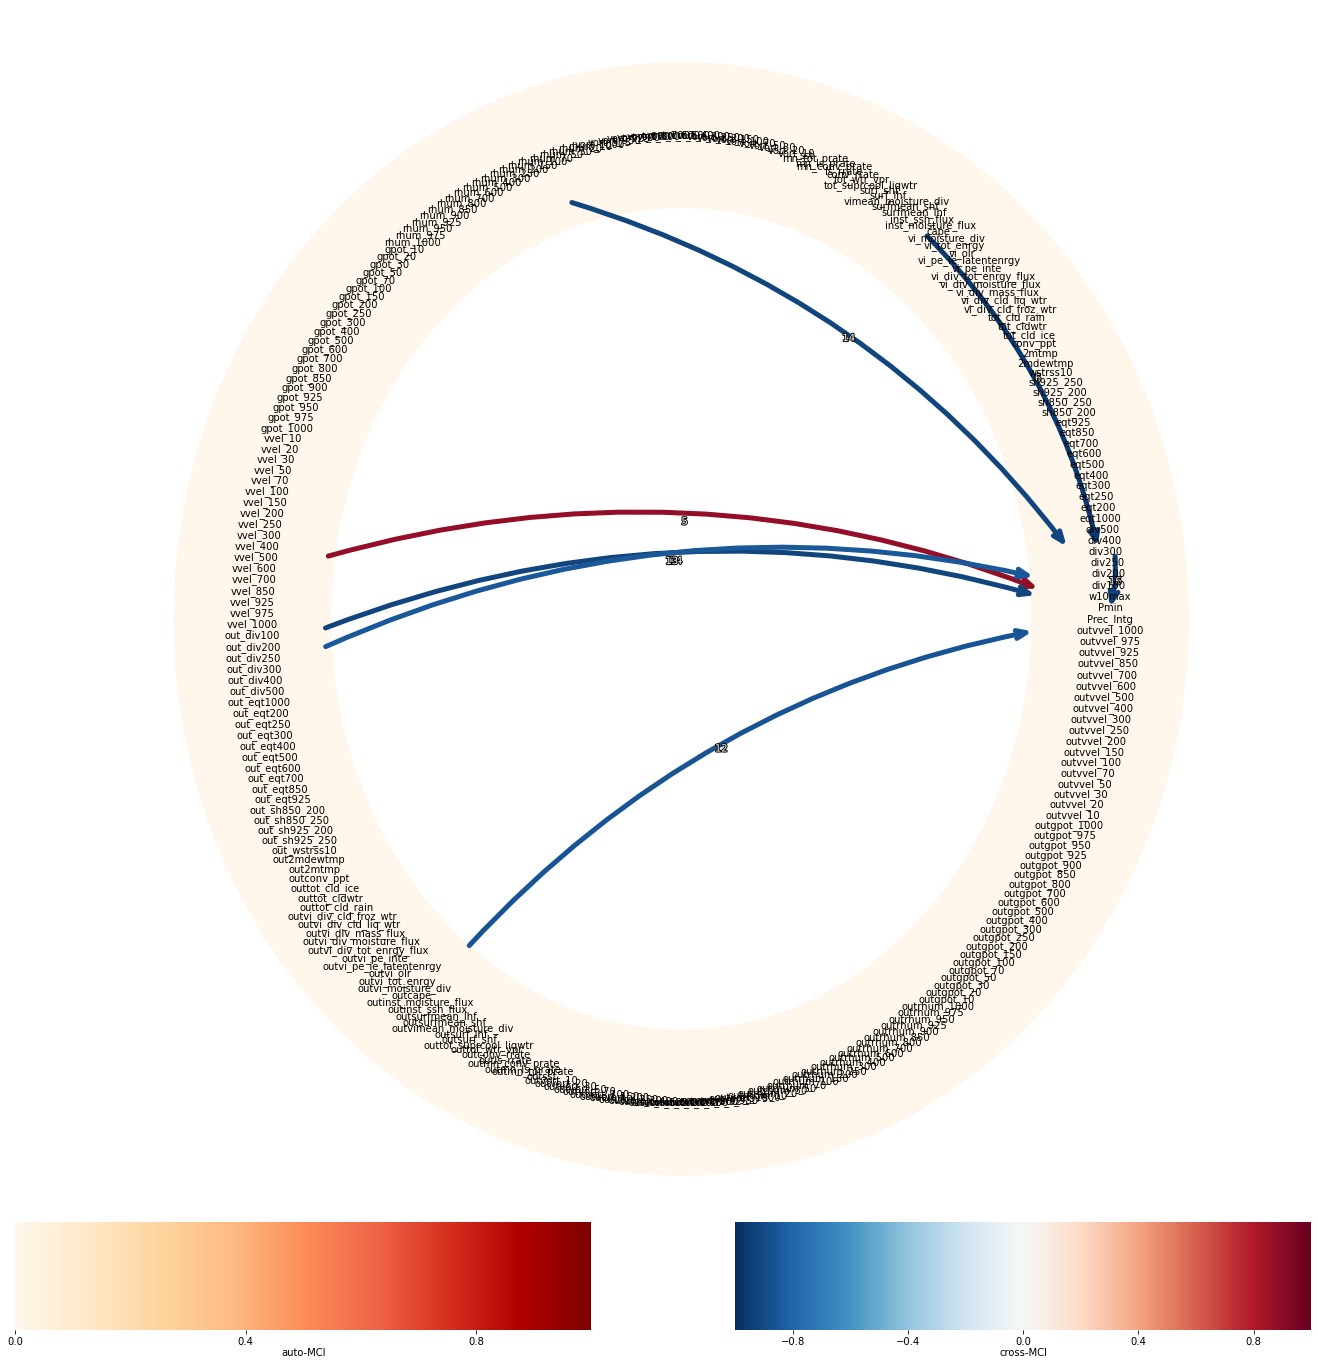

<Figure size 1440x1800 with 0 Axes>

In [17]:
fig=plt.rcParams["figure.figsize"] = (20,25)
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names_wmax,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()
plt.savefig('3outputs_fani_allvars.png')